### 1. 문자열 압축
#### 풀이1. defaultdict활용 (오답)
- <strong>연속된</strong> 문자만 처리해야 되는데, 그렇지 않은 문자까지 카운트하는 문제 발생

In [ ]:
from collections import defaultdict

def solution(s):
    length = len(s)
    result = [length]
    for step in range(1,length+1):
        temp_dict = defaultdict()
        for idx in range(0,length,step):
            word = s[idx:idx+step]
            temp_dict[word] += 1
#         temp_dict의 각 key의 value를 취합해 count하려 했음
#         하지만 연속되지 않은 것도 count하는 문제 발생
    answer = min(result)
    return answer


#### 풀이 2. pre_word와 cur_word 비교 count
- pre_word와 cur_word가 같을때마다 combo증가, 마지막 pre_word는 combo에 따라 결정
- <strong>step으로 시작하는 cur_word 처리 중요</strong>

In [ ]:
def solution(s):
    length = len(s)
    result = [length]
    for step in range(1,length+1):
        temp, combo, sum_value = [], 1, 0
        pre_word = s[0:step]
        for idx in range(step,length,step):
            cur_word = s[idx:idx+step]
            if pre_word == cur_word:
                combo += 1
                pre_word = cur_word
            else:
                if combo != 1:
                    temp.append(str(combo) + pre_word)
                else:
                    temp.append(pre_word)
                combo = 1
                pre_word = cur_word
        if combo != 1:
            temp.append(str(combo) + pre_word)
        else:
            temp.append(pre_word)
        # print(temp)
        for w in temp:
            sum_value += len(w)
        result.append(sum_value)

    answer = min(result)
    return answer

print(solution("aabbaccc"))
print(solution("ababcdcdababcdcd"))
print(solution("abcabcabcabcdededededede"))


### 2. 괄호변환
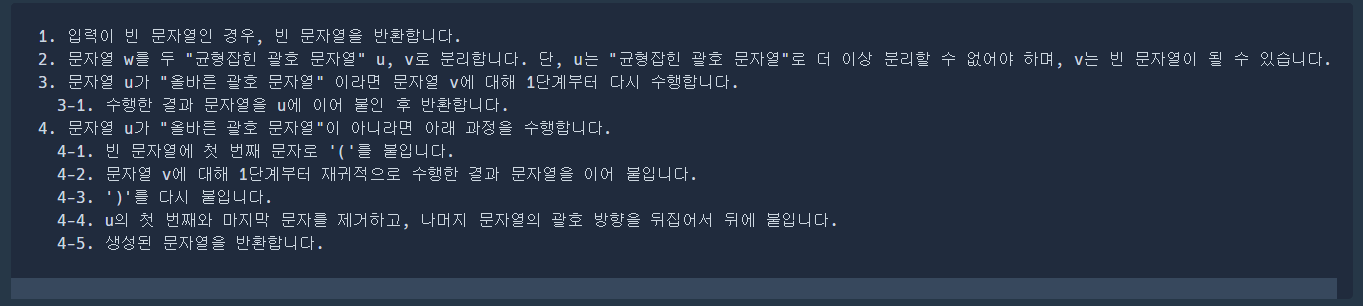

#### 풀이
- <strong>요구사항에 적힌대로 구현</strong>하면되는데, 문제 이해가 어려웠음

In [1]:
# def check_bal(p):
#     opened = p.count('(')
#     closed = p.count(')')
#     if opened == closed:
#         return True
#     else:
#         return False       

def check_right(p):
    stack, ptr = [], 0
    for i in range(len(p)):
        if p[i] == '(':
            stack.append('(')
            ptr += 1
        else:
            if stack:
                stack.pop()
            else:
                return False
            ptr -= 1
            if ptr < 0 :
                return False
    return True


def divide(p):
    openP, closeP = 0, 0

    for i in range(len(p)):
        if p[i] == '(':
            openP += 1
        else:
            closeP += 1
        if openP == closeP:
            return p[:i+1], p[i+1:]


def solution(p):
    if not p:
        return ""

    answer, u_str, v_str = '' , '', ''
    u_str, v_str = divide(p)

    if check_right(u_str):
        return u_str + solution(v_str)
    else:
        answer += '('
        answer += solution(v_str)
        answer += ')'

        for i in u_str[1:len(u_str) - 1]:
            if i == '(':
                answer += ')'
            else:
                answer += '('
        return answer

print(solution("(()())()"))
print(solution("()))((()"))

(()())()
()(())()
